In [37]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import os
import cPickle as pickle
from collections import Counter
import pandas


In [2]:
root = "../vinedata/Data/"

In [23]:

def getVisited():
    visited = []
    f = open(visitedList, 'rb')
    visited = pickle.load(f)
    return visited


def walkLevel1Dir(root):
    count = 0
    dirList = []
    filesList = []
    for path, dirs, files in os.walk(root):
        if count > 0:
            return dirList , fileList
        dirList = dirs
        fileList = files
        count = count + 1


def getPopularFile(rootDir):
    if os.path.exists(rootDir + '/popular.json'):
        f = open(rootDir + '/popular.json' ,'r')
        print rootDir + '/popular.json'
        try:
            data = json.load(f)
        except:
            data = []
    else:
        data = []
    return data

    
    
def getPopularPosts(popular):
    records = popular['data']['records']
    posts=[]
    for i in range (0 , len(records)):
        loopCount = records[i]['reposts']['count']
        if(loopCount > loopThreshold):
            posts.append(records[i])
    return posts

def getRecords(popular):
    records = []
    records = popular['data']['records']
    return records

def find(lst, val):
    return [i for i, x in enumerate(lst) if x == val]

# def getPopularFile(rootDir):
#     f = open(rootDir + '/popular.json' ,'r')
#     data = json.load(f)
#     return data




In [24]:
dirs,files = walkLevel1Dir(root)
allPosts = []
#print dirs
for d in dirs:
    dataRoot = root + d
    popular = getPopularFile(dataRoot)
    rec = getRecords(popular)
    allPosts += rec

../vinedata/Data/1449016201/popular.json
../vinedata/Data/1448816402/popular.json
../vinedata/Data/1448854202/popular.json
../vinedata/Data/1449057602/popular.json
../vinedata/Data/1448942401/popular.json
../vinedata/Data/1448951401/popular.json
../vinedata/Data/1451412008/popular.json
../vinedata/Data/1448762402/popular.json
../vinedata/Data/1450256408/popular.json
../vinedata/Data/1448775001/popular.json
../vinedata/Data/1448769601/popular.json
../vinedata/Data/1449127802/popular.json
../vinedata/Data/1451260803/popular.json
../vinedata/Data/1449025201/popular.json
../vinedata/Data/1449043201/popular.json
../vinedata/Data/1448737202/popular.json
../vinedata/Data/1448865003/popular.json
../vinedata/Data/1448650072/popular.json
../vinedata/Data/1450364402/popular.json
../vinedata/Data/1451282402/popular.json
../vinedata/Data/1449072002/popular.json
../vinedata/Data/1450418401/popular.json
../vinedata/Data/1449052202/popular.json
../vinedata/Data/1448982002/popular.json
../vinedata/Data

In [25]:
print len(allPosts)

25533


In [41]:
users = []
postId = []
for post in allPosts:
    if post['postId'] in postId:
        print "Duplicate"
    else:      
        users.append(post['userId'])
        postId.append(post['postId'])

Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate
Duplicate


In [53]:
letter_counts = Counter(users)

In [72]:
vid_counts = []
multi_users = []
videoMin =  2
for i in letter_counts:
    vid_counts.append(letter_counts[i])
    if letter_counts[i] > videoMin:
        multi_users.append(i)

In [73]:
hist_video = np.asarray(vid_counts , dtype = 'int16')

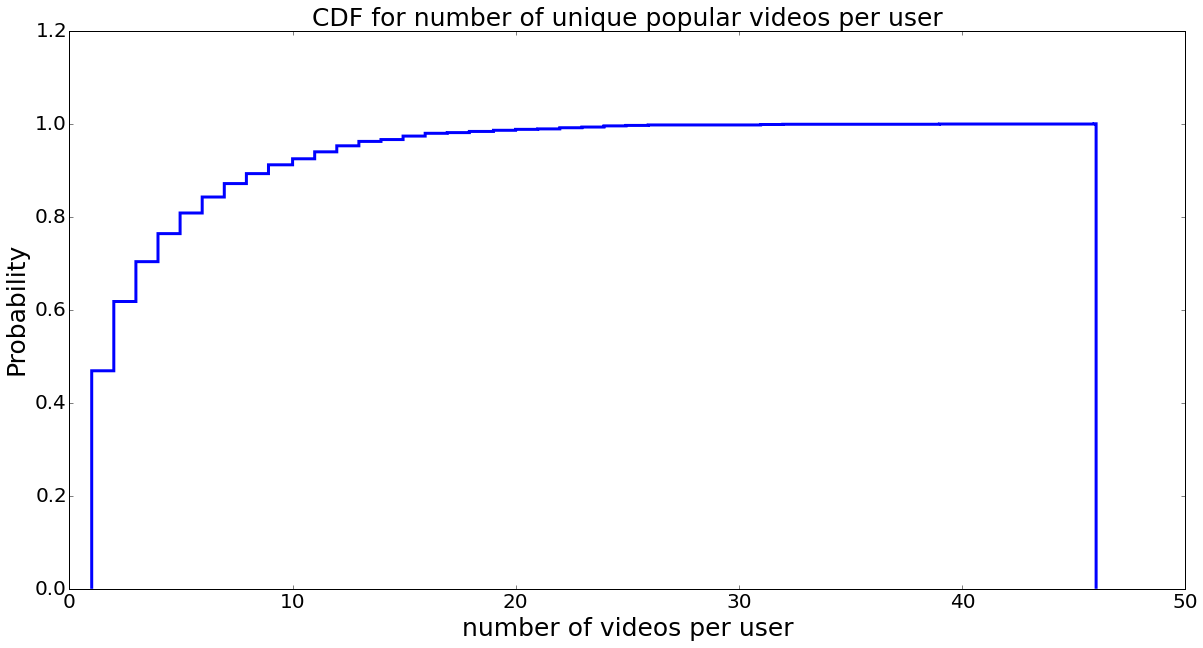

In [74]:
fig, ax = plt.subplots()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
fig.set_size_inches(20, 10)
plt.hist(hist_video, 500, normed=1,histtype='step', cumulative=True,linewidth = 3.0)
plt.title("CDF for number of unique popular videos per user", fontsize = 25)
plt.xlabel("number of videos per user",fontsize = 25)
plt.ylabel("Probability",fontsize = 25)
plt.show()

In [77]:
print len(multi_users)
print len(letter_counts)

767
2007
